In [1]:
import pandas as pd

#import data
data = pd.read_csv('hotel_bookings.csv')
data.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


### Analyzing the raw data (EDA)

Exploring the types of each variable and some basic statistical information.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

In [12]:
#only the categorical ones
data.describe(include='object').T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


In [14]:
#only int and float
data.describe(exclude='object').T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


### Graphical Analysis

Analyzing the behavior of some variables and checking the need for normalization of quantitative variables.

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

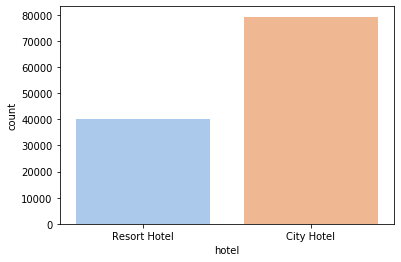

In [10]:
#checking the hotel types distribution
sns.countplot(data['hotel'], palette='pastel')

Text(0.5, 0, 'Canceled')

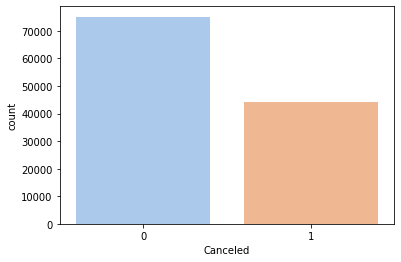

In [11]:
#checking the proportion of canceled bookings
plot = sns.countplot(data['is_canceled'], palette='pastel')
plot.set_xlabel("Canceled")

Text(0, 0.5, 'Previous Cancellations')

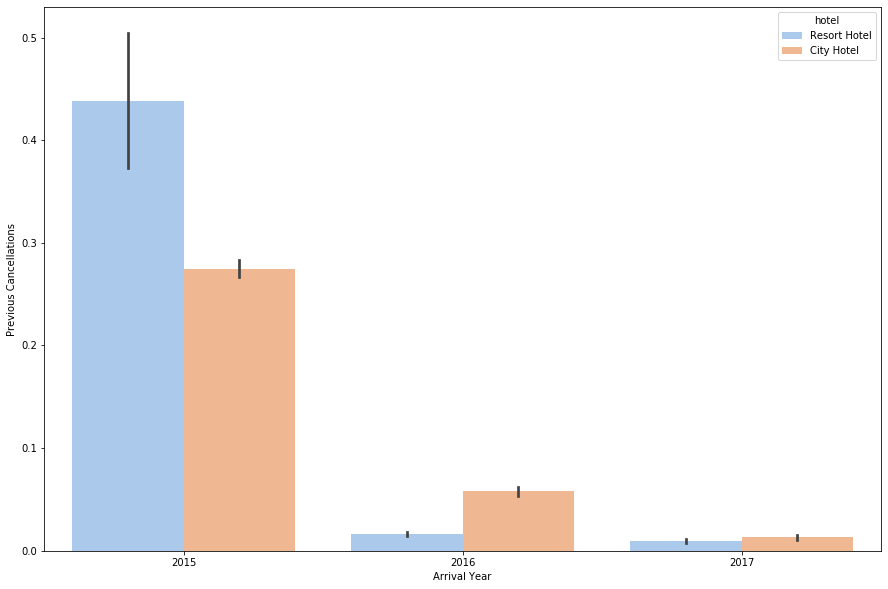

In [6]:
#checking previous cancellations by hotel type on years
plt.figure(figsize=(15,10))
plot = sns.barplot(data['arrival_date_year'], data['previous_cancellations'], hue=data['hotel'], palette='pastel')
plot.set_xlabel("Arrival Year")
plot.set_ylabel("Previous Cancellations")
#plt.setp(plot.get_legend().get_title(), fontsize='30') # for hue legend title
#plt.setp(plot.get_legend().get_texts(), fontsize='20') # for hue legend text
#plot.tick_params(labelsize=20) #for size of labels x and y

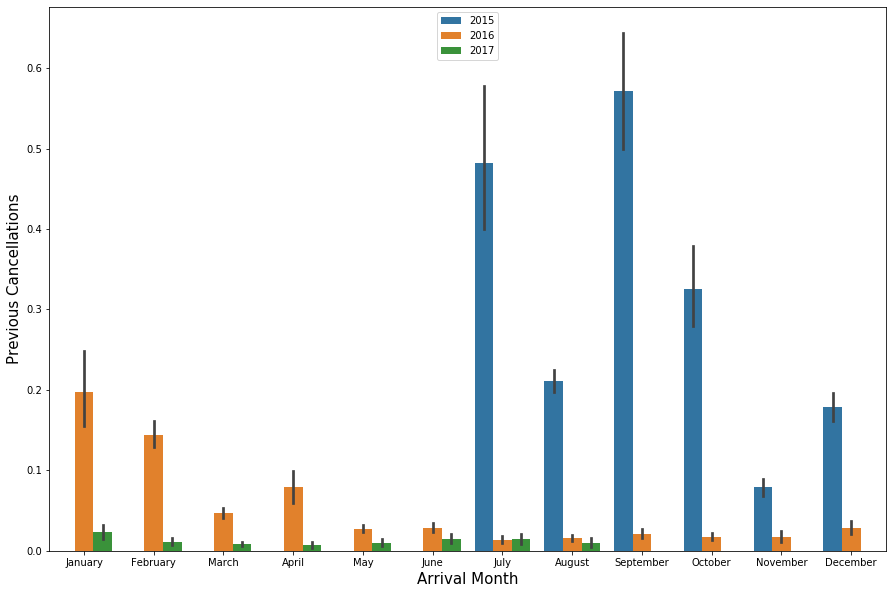

In [66]:
#checking previous cancellations on arrival months on each year
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']

plt.figure(figsize=(15,10))
plot = sns.barplot(data['arrival_date_month'], data['previous_cancellations'], hue=data['arrival_date_year'], order=month_order)
plot.set_xlabel("Arrival Month", fontsize=15)
plot.set_ylabel("Previous Cancellations", fontsize=15)
plt.legend(loc='best')

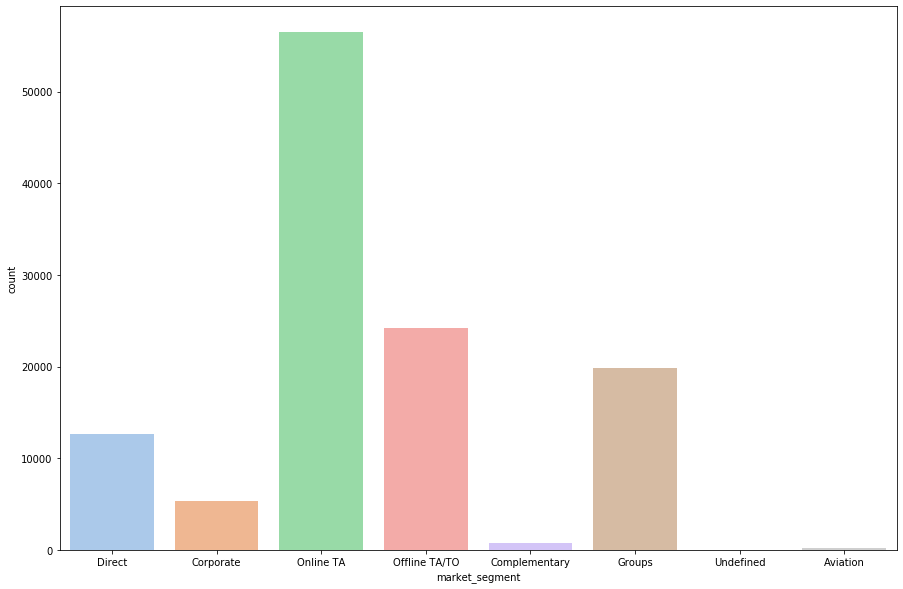

In [42]:
#checking the frequency of the segments for which reservations were made
plt.figure(figsize=(15,10))
sns.countplot(data['market_segment'], palette='pastel')

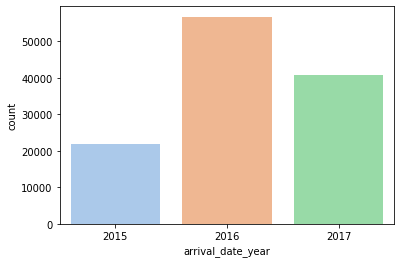

In [56]:
#checking the years distribution
sns.countplot(data['arrival_date_year'], palette='pastel')

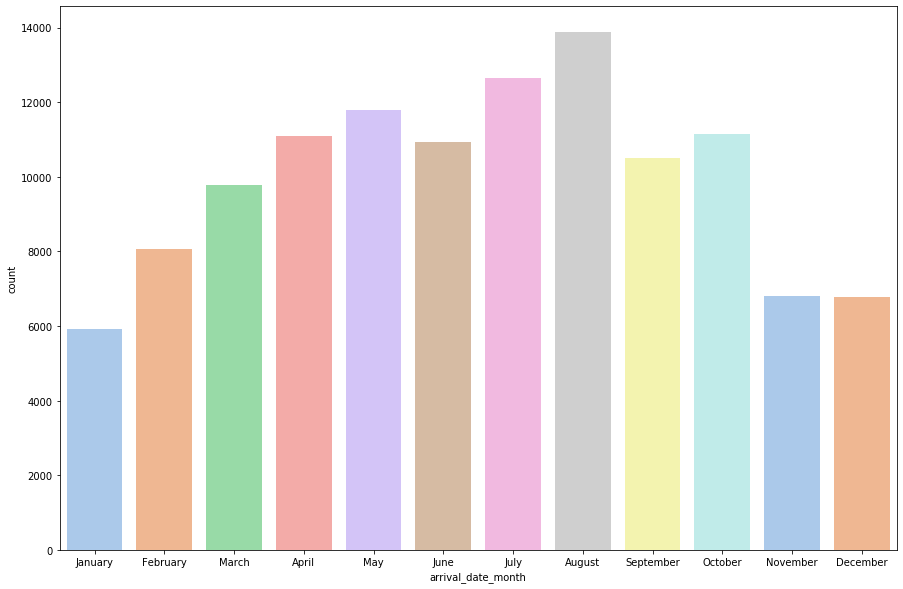

In [66]:
#Checking the months distribution
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']

plt.figure(figsize=(15,10))
sns.countplot(data['arrival_date_month'], order=month_order, palette='pastel')

### Checking distribution of some variables

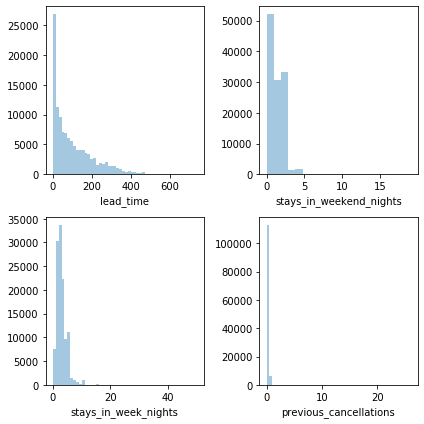

In [75]:
f = plt.figure(figsize=(6,6))
grid_spec = f.add_gridspec(2,2)

ax = f.add_subplot(grid_spec[0,0])
sns.distplot(data['lead_time'], kde=False)

ax = f.add_subplot(grid_spec[0,1])
sns.distplot(data['stays_in_weekend_nights'], bins=20, kde=False)

ax = f.add_subplot(grid_spec[1,0])
sns.distplot(data['stays_in_week_nights'], kde=False)

ax = f.add_subplot(grid_spec[1,1])
sns.distplot(data['previous_cancellations'], kde=False)

f.tight_layout()

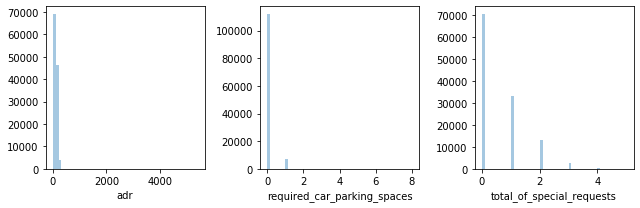

In [90]:
f = plt.figure(figsize=(9,3))
grid_spec = f.add_gridspec(1,3)

ax = f.add_subplot(grid_spec[0,0])
sns.distplot(data['adr'], kde=False)

ax = f.add_subplot(grid_spec[0,1])
sns.distplot(data['required_car_parking_spaces'], kde=False)

ax = f.add_subplot(grid_spec[0,-1])
sns.distplot(data['total_of_special_requests'], kde=False)


f.tight_layout()

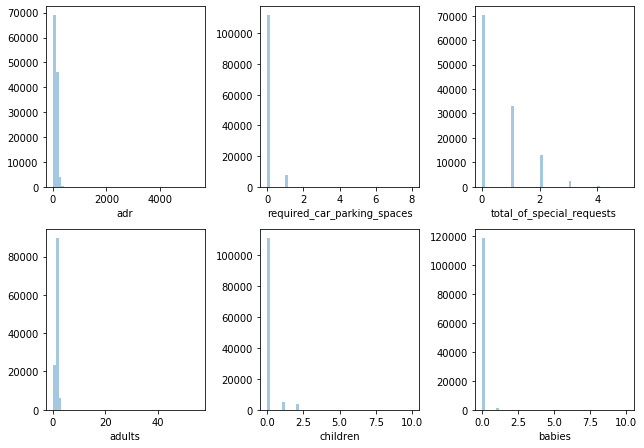

In [92]:
f = plt.figure(figsize=(9,9))
grid_spec = f.add_gridspec(3,3)

ax = f.add_subplot(grid_spec[0,0])
sns.distplot(data['adr'], kde=False)

ax = f.add_subplot(grid_spec[0,1])
sns.distplot(data['required_car_parking_spaces'], kde=False)

ax = f.add_subplot(grid_spec[0,-1])
sns.distplot(data['total_of_special_requests'], kde=False)

ax = f.add_subplot(grid_spec[1,0])
sns.distplot(data['adults'], kde=False)

ax = f.add_subplot(grid_spec[1,1])
sns.distplot(data['children'], kde=False)

ax = f.add_subplot(grid_spec[1,-1])
sns.distplot(data['babies'], kde=False)


f.tight_layout()